<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Price Prediction

--- 
# Part 2: Preprocessing and Feature Engineering

This part mainly created feature matrix, after removing multicolliear features, I got a list of highly correlated features after Correlation Analysis.
(note:One-hot Encode will be done on Part 3)


---

### Contents:
- [1. Importing Libraries](#1.-Importing-Libraries)
- [2. Data Import](#2.-Data-Import)
- [3. Create New Features & Inspection Linear Relationship To Target](#3.-Create-New-Features-&-Inspection-Linear-Relationship-To-Target)
- [4. Remove Multicolliear Features](#4.-Remove-Multicolliear-Features)
- [5. Logarithmic Transformation of Sales Price](#5.-Logarithmic-Transformation-of-Sales-Price)
- [6. Correlation Analysis](#6.-Correlation-Analysis)
- [Conclusion](#Conclusion)

Train & Test Datasets will be inspected and handled concurrently.

---

# 1. Import Libraries

---

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

---

# 2. Data Import

---
Below 3 Datasets as the output/results of "Part 1-Data Cleaning & Exploratory Data Analysis" will be loaded.
- Cleaned Datasets(Train & Test)
- Cleaned Features & Feature Type
- Strong Correlated Features 

### 2.1 Load Cleaned Datasets

In [2]:
path = "../datasets/part1/"

#import train & test cleaned dataset
df_train = pd.read_csv(path + "train_clean_after_part1.csv", keep_default_na = False)
df_test  =pd.read_csv(path + "test_clean_after_part1.csv", keep_default_na = False)

In [3]:
df_train.head()

,Id,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,TotRms AbvGrd_new
0,109,60,RL,13517,Pave,na,2,Lvl,1,CulDSac,...,0,0,0,na,0,3,2010,WD,130500,4
1,544,60,RL,11492,Pave,na,2,Lvl,1,CulDSac,...,0,0,0,na,0,4,2009,WD,220000,5
2,153,20,RL,7922,Pave,na,1,Lvl,1,Inside,...,0,0,0,na,0,1,2010,WD,109000,4
3,318,60,RL,9802,Pave,na,1,Lvl,1,Inside,...,0,0,0,na,0,4,2010,WD,174000,4
4,255,50,RL,14235,Pave,na,2,Lvl,1,Inside,...,0,0,0,na,0,3,2010,WD,138500,4


In [4]:
df_test.head()

,Id,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,TotRms AbvGrd_new
0,2658,190,RM,9142,Pave,Grvl,1,Lvl,1,Inside,...,0,0,0,0,na,0,4,2006,WD,6
1,2718,90,RL,9662,Pave,na,2,Lvl,1,Inside,...,0,0,0,0,na,0,8,2006,WD,8
2,2414,60,RL,17104,Pave,na,2,Lvl,1,Inside,...,0,0,0,0,na,0,9,2006,New,4
3,1989,30,RM,8520,Pave,na,1,Lvl,1,Inside,...,0,0,0,0,na,0,7,2007,WD,3
4,625,20,RL,9500,Pave,na,2,Lvl,1,Inside,...,185,0,0,0,na,0,7,2009,WD,4


### 2.2 Load  Cleaned Features & Feature Type

In [5]:
#import cleaned features and feature type

df_features = pd.read_csv(path + "All_Features_cleaned_part1.csv", keep_default_na = False)

In [6]:
df_features.shape

(75, 2)

In [7]:
df_features.head()

,FeatureName,FeatureType
0,Lot Area,Continuous
1,BsmtFin SF 1,Continuous
2,BsmtFin SF 2,Continuous
3,Bsmt Unf SF,Continuous
4,Total Bsmt SF,Continuous


In [8]:
df_features.groupby("FeatureType").count()

,FeatureName
FeatureType,
Continuous,17
Discrete,12
Nominal,22
Ordinal,23
Target,1


In [9]:
continuous_cols = df_features[df_features['FeatureType'] =="Continuous"]["FeatureName"].tolist()
discrete_cols = df_features[df_features['FeatureType'] =="Discrete"]["FeatureName"].tolist()
nominal_cols = df_features[df_features['FeatureType'] =="Nominal"]["FeatureName"].tolist()
ordinal_cols = df_features[df_features['FeatureType'] =="Ordinal"]["FeatureName"].tolist()
target_variable = df_features[df_features['FeatureType'] =="Target"]["FeatureName"].tolist()

### 2.3 Load Del/Add Features

In [10]:
#import cleaned features and feature type
df_features = pd.read_csv(path + "Del_Add_Features_part1.csv", keep_default_na = False)

In [11]:
df_features.shape

(8, 2)

In [12]:
df_features.head()

,FeatureName,Del/Add
0,PID,Deleted
1,Garage Yr Blt,Deleted
2,Lot Frontage,Deleted
3,Mas Vnr Area,Deleted
4,TotRms AbvGrd,Deleted


In [13]:
df_features.groupby("Del/Add").count()

,FeatureName
Del/Add,
Added,1
Deleted,7


In [14]:
del_cols = df_features[df_features['Del/Add'] =="Deleted"]["FeatureName"].tolist()
new_cols = df_features[df_features['Del/Add'] =="Added"]["FeatureName"].tolist()

### 2.4 Load High Correlated Features

In [15]:
#import high correlated features from part1 result
df_high_corr = pd.read_csv(path + "highly_corr_features_after_part1.csv", keep_default_na = False)

In [16]:
df_high_corr.shape

(8, 2)

In [17]:
df_high_corr.head()

,Coefficient Values,features
0,0.830000,Street
1,0.803462,Overall Qual
2,0.719463,Gr Liv Area
3,0.665116,Total Bsmt SF
4,0.655097,Garage Area


In [18]:
strong_cols = df_high_corr['features']
strong_cols

0           Street
1     Overall Qual
2      Gr Liv Area
3    Total Bsmt SF
4      Garage Area
5       1st Flr SF
6      Garage Cars
7        MS Zoning
Name: features, dtype: object

## 3. Create New Features & Inspection Linear Relationship To Target

### 3.1 Create variables for the total Square Feet, total Porch SF, total Bath
These are common house information in the housing advertisement. 

In [19]:
#define a function to delete a list of variables b from list a
def remove_frm_list (a,b): 
    for x in b:
        try: 
            a.remove(x)
        except ValueError:
            pass
    
    return a

In [20]:
# Total size of the house in square feet
df_train['Total SF'] = df_train['Gr Liv Area'] + df_train['Total Bsmt SF']
df_test['Total SF'] = df_test['Gr Liv Area'] + df_test['Total Bsmt SF']

In [21]:
df_train[ordinal_cols].head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,2,1,1,6,8,3,4,4,4,1,...,5,3,7,0,2,4,4,3,0,0
1,2,1,1,7,5,3,4,3,4,1,...,5,3,7,4,2,4,4,3,0,0
2,1,1,1,5,7,4,3,4,4,1,...,5,3,7,0,1,4,4,3,0,0
3,1,1,1,5,5,4,4,3,4,1,...,5,4,7,0,3,4,4,3,0,0
4,2,1,1,6,8,4,4,2,3,1,...,5,4,7,0,1,4,4,1,0,0


In [22]:
#Total Porch size in square feet 
df_train['Total Porch SF'] = (df_train['3Ssn Porch'] + df_train['Enclosed Porch']+ df_train['Open Porch SF'] 
+ df_train['Wood Deck SF'] + df_train['Screen Porch'])

df_test['Total Porch SF'] = (df_test['3Ssn Porch'] + df_test['Enclosed Porch']+ df_test['Open Porch SF'] 
+ df_test['Wood Deck SF'] + df_test['Screen Porch'])

In [23]:
#Total Bathrooms
df_train['Total Bath'] = (df_train['Full Bath'] + 0.5 * df_train['Half Bath']
+ df_train['Bsmt Full Bath'] + 0.5*df_train['Bsmt Half Bath'])

df_test['Total Bath'] = (df_test['Full Bath'] + 0.5 * df_test['Half Bath']
+ df_test['Bsmt Full Bath'] + 0.5*df_test['Bsmt Half Bath'])

In [24]:
# Age of Built
df_train["Age of Built"] = df_train['Yr Sold'] - df_train['Year Built']
df_test["Age of Built"] = df_test['Yr Sold'] - df_test['Year Built']

In [25]:
# add the new features into variable columns list
continuous_cols.extend(['Total SF', 'Total Porch SF'])
discrete_cols.extend(['Total Bath'])
continuous_cols.extend(['Age of Built'])

new_cols.extend(['Total SF', 'Total Porch SF', 'Total Bath', 'Age of Built'])

In [26]:
# drop duplicated columns as the newly created features are able to present these fetures
to_remove_1= ['3Ssn Porch' , 'Enclosed Porch', 'Open Porch SF','Wood Deck SF','Screen Porch']
to_remove_2 = ['Full Bath','Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath']
to_remove = to_remove_1 + to_remove_2

In [27]:
continuous_cols = remove_frm_list(continuous_cols, to_remove_1)
discrete_cols = remove_frm_list(discrete_cols, to_remove_2)

In [28]:
# drop these columns from both Train & Test datasets
df_train.drop(columns = to_remove , inplace = True)
df_test.drop(columns = to_remove , inplace = True)

# Add the dropped columns into del_cols group
del_cols.extend(to_remove)

In [29]:
continuous_cols

['Lot Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Pool Area',
 'Misc Val',
 'Total SF',
 'Total Porch SF',
 'Age of Built']

In [30]:
discrete_cols

['Id',
 'Year Built',
 'Year Remod/Add',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold',
 'TotRms AbvGrd_new',
 'Total Bath']

In [31]:
del_cols

['PID',
 'Garage Yr Blt',
 'Lot Frontage',
 'Mas Vnr Area',
 'TotRms AbvGrd',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 '3Ssn Porch',
 'Enclosed Porch',
 'Open Porch SF',
 'Wood Deck SF',
 'Screen Porch',
 'Full Bath',
 'Half Bath',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [32]:
new_cols

['TotRms AbvGrd_new',
 'Total SF',
 'Total Porch SF',
 'Total Bath',
 'Age of Built']

In [33]:
strong_cols

0           Street
1     Overall Qual
2      Gr Liv Area
3    Total Bsmt SF
4      Garage Area
5       1st Flr SF
6      Garage Cars
7        MS Zoning
Name: features, dtype: object

### 3.2 Create new features for house characteristics

Certain house characteristics can be presented by "binary" format, and they are assumed have influence on the sales price. For example, the existence of a pool could be an important predictor while the exact size of the pool can be deemed not so important. 

In [34]:
new_variables = {
    "has 2nd Flr" :"2nd Flr SF",
    "has Bsmt" : "Total Bsmt SF",
    "has Fireplace" : "Fireplaces",
    "has Garage" : "Garage Area",
    "has Pool": "Pool Area",
    "has Porch": "Total Porch SF"
}

for new_variable, col in new_variables.items():
    
    df_train[new_variable] = df_train[col].apply(lambda x: 1 if x>0 else 0)
    df_test[new_variable] = df_test[col].apply(lambda x: 1 if x>0 else 0)

# add new features into their respective feature groups
discrete_cols.extend(new_variables)

new_cols.extend(new_variables)

In [35]:
df_train[new_variables].head()

,has 2nd Flr,has Bsmt,has Fireplace,has Garage,has Pool,has Porch
0,1,1,0,1,0,1
1,1,1,1,1,0,1
2,0,1,0,1,0,1
3,1,1,0,1,0,1
4,1,1,0,1,0,1


### 3.3 Inspection new features linear relationships to the target

#### 3.3.1 Total SF

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


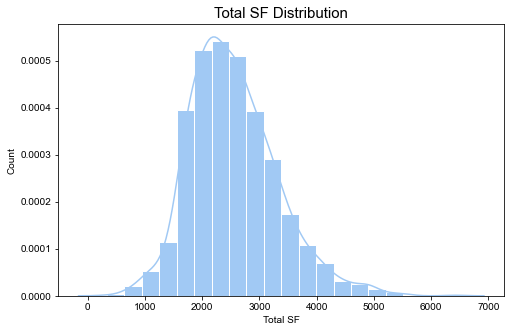

In [36]:
# check the distribution of Total SF on Train Dataset
sns.set_palette("pastel")
_, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Total SF Distribution", fontsize=15)
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
sns.distplot(df_train['Total SF'], 
             norm_hist=False, 
             kde=True, 
             bins=20, 
             hist_kws={"alpha": 1}).set(xlabel='Total SF', ylabel='Count');

## Comments:

Total SF is not normal distributed, it's slightly right skewed, the majority of house total SF is around 2000-3000.

Text(-13.369000000000007, 0.5, 'Sales Price')

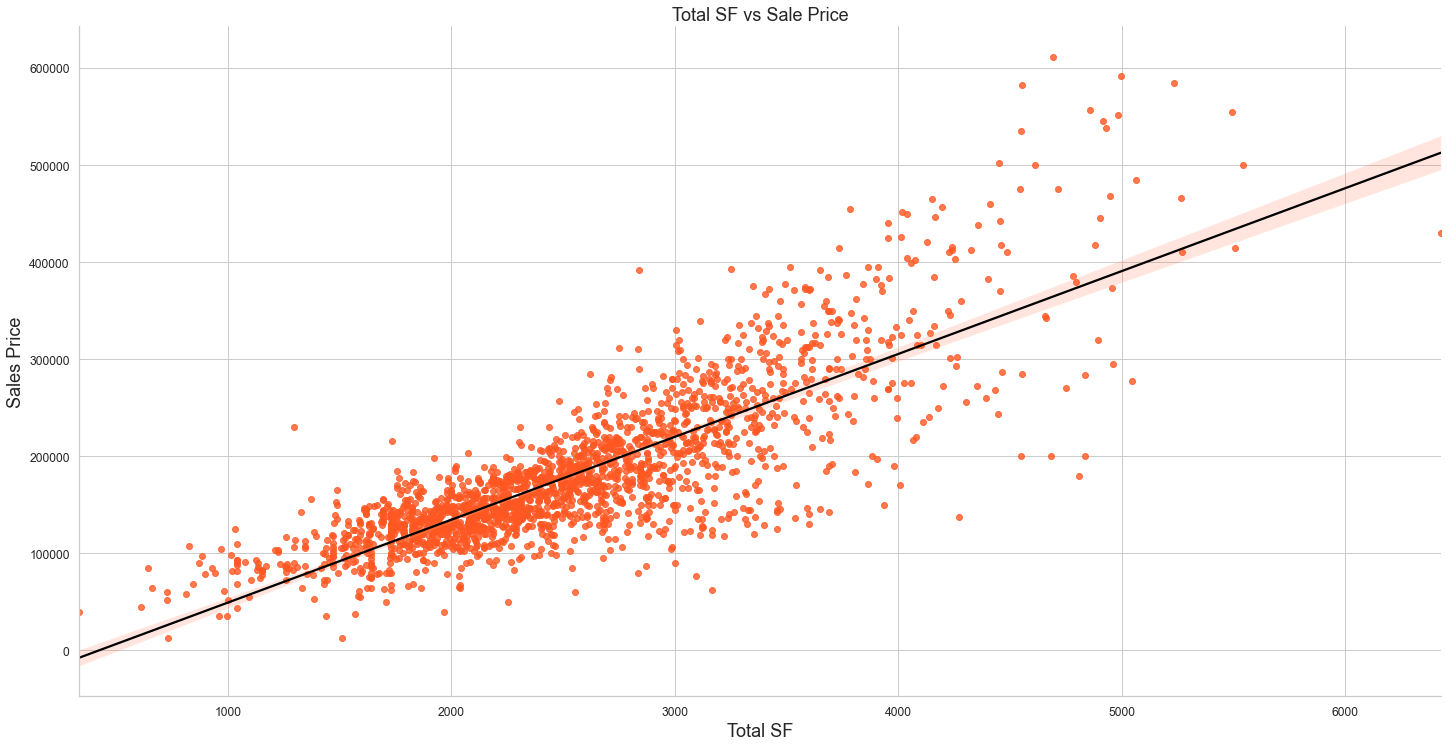

In [37]:
# Check Total SF vs Sales Price the linear relationship
sns.set_palette(['#FF5722'])
sns.lmplot(x='Total SF', y='SalePrice', data=df_train, height=10, aspect=2)
ax = plt.gca()
ax.get_lines()[0].set_color("black")
ax.set_title('Total SF vs Sale Price', fontsize = 18)
ax.set_xlabel("Total SF", fontsize=18);
ax.set_ylabel("Sales Price", fontsize=18)

## Comments:

This plot shows total SF is positively correlated with the house sale price, which it implies that the bigger size of the house, the higher sales price it will be sold. 

### 3.3.2 Total Porch SF

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


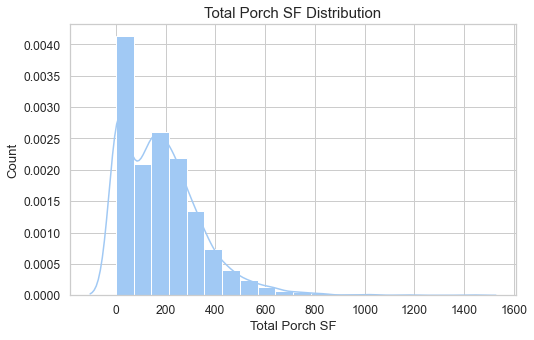

In [38]:
# check the distribution of Total Porch SF on Train Dataset
sns.set_palette("pastel")
_, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Total Porch SF Distribution", fontsize=15)
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
sns.distplot(df_train['Total Porch SF'], 
             norm_hist=False, 
             kde=True, 
             bins=20, 
             hist_kws={"alpha": 1}).set(xlabel='Total Porch SF', ylabel='Count');

Text(-13.369000000000007, 0.5, 'Sales Price')

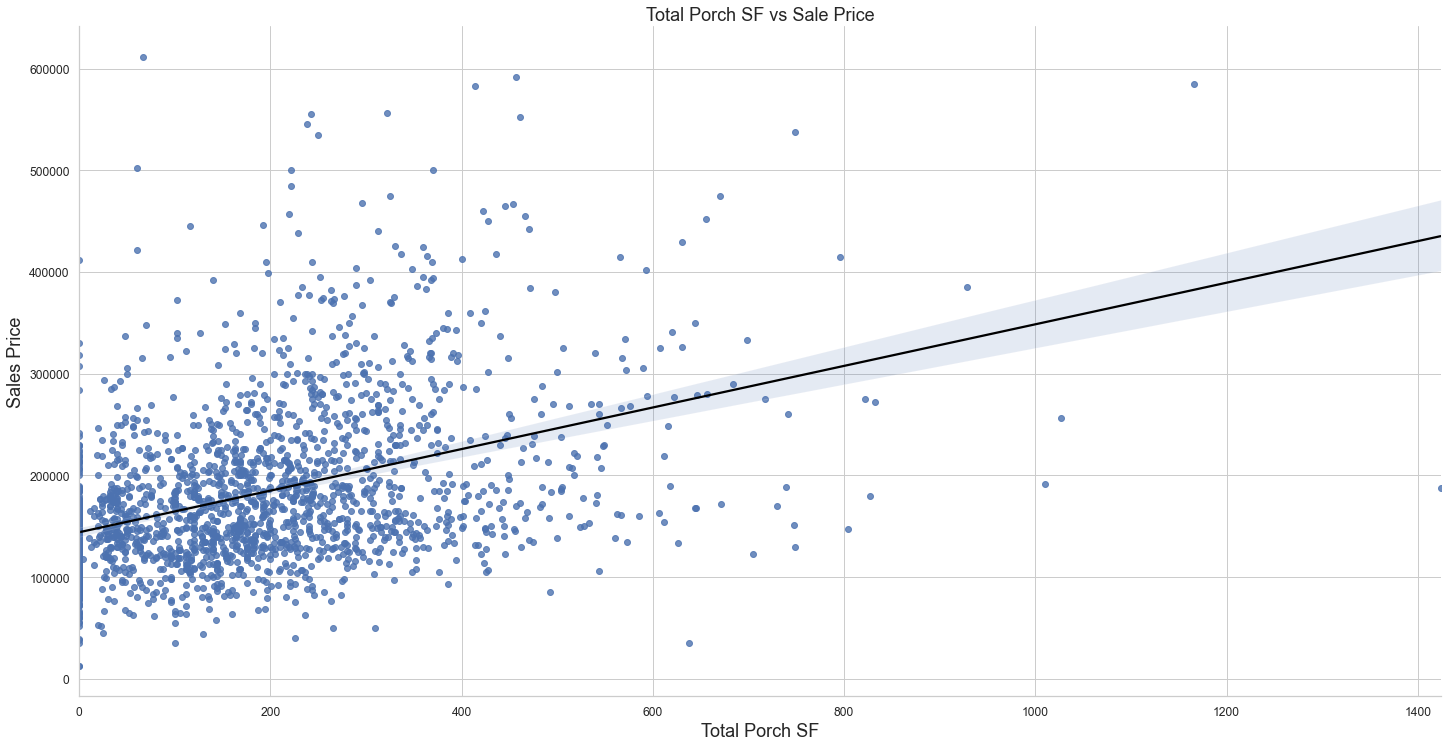

In [39]:
# Check Total SF vs Sales Price the linear relationship
sns.lmplot(x='Total Porch SF', y='SalePrice', data=df_train, height=10, aspect=2)
ax = plt.gca()
ax.get_lines()[0].set_color("black")
ax.set_title('Total Porch SF vs Sale Price', fontsize = 18)
ax.set_xlabel("Total Porch SF", fontsize=18);
ax.set_ylabel("Sales Price", fontsize=18)

In [40]:
df_train['Total Porch SF'].describe()

count    2049.000000
mean      182.494388
std       158.936345
min         0.000000
25%        49.000000
50%       164.000000
75%       267.000000
max      1424.000000
Name: Total Porch SF, dtype: float64

## Comments:

1. The distribution shows Total Porch SF is not normally distributed
2. From the summary statistics & the scatter plot, We can see the mean of a Total Porch SF is 182.49, and 75% percentile of the houses with 267SF of the Total Porch that doesn't seem to be a big area size, means that most houses don't seem to have a big area of Porch.
3. From the scatter plot, We cannot conclude a clearly correlation between Total Porch SF and Sales Price, it may be an not important predictor.

### 3.3.3 Total Bath

<AxesSubplot:title={'center':'Total Bath vs Sale Price'}, xlabel='Total Bath', ylabel='SalePrice'>

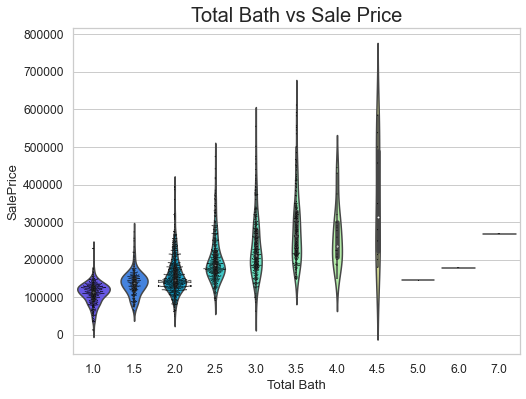

In [41]:
plt.figure(figsize=(8,6))
plt.title('Total Bath vs Sale Price', fontsize=20)
sns.violinplot(x='Total Bath', y='SalePrice', data=df_train, palette='rainbow')
sns.swarmplot(x='Total Bath', y='SalePrice', data=df_train, color='black', size=1)

## Comment:

From above violinplot, We can see there is no strong positive correlation to Sales Price, as while the Total Bath count increases, the Sales Price doesn't seem to increase a lot. The increasing variance is small. This feature-Total Bath may be not an important predictor.

### 3.3.4 Correlation Analysis for House Characters

#### 3.3.4.1 has 2nd floor

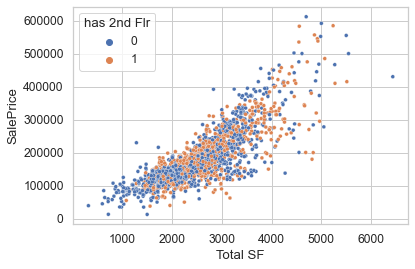

In [42]:
sns.scatterplot(x="Total SF", y="SalePrice", hue="has 2nd Flr", s=15, data=df_train);

## Comments:
A second floor may have a positive effect on the sales price. However, having a second floor correlates with overall living space. The individual effect is therefore not as clear as it seems in the plot above.

### 3.3.3.2 has Basement

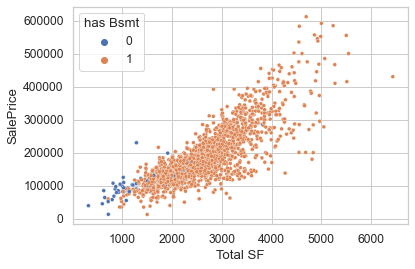

In [43]:
sns.scatterplot(x="Total SF", y="SalePrice", hue="has Bsmt", s=15, data=df_train);

## Comments:
Almost all houses at Ames has the basement, therefore, it's not an important predictor.

#### 3.3.3.3 has Fireplace

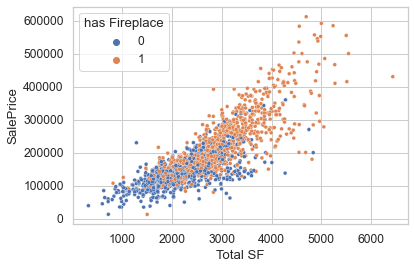

In [44]:
sns.scatterplot(x="Total SF", y="SalePrice", hue="has Fireplace", s=15, data=df_train);

## Comments:

Bigger house are more likely to have a basement, "has Fireplace" might be an interesting predictor.

#### 3.3.3.4 has Garage

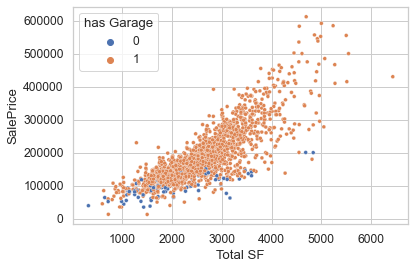

In [45]:
sns.scatterplot(x="Total SF", y="SalePrice", hue="has Garage", s=15, data=df_train);

## Comments:
Almost all houses at Ames has the garage, therefore, it's not an important predictor.

#### 3.3.3.5 has Pool

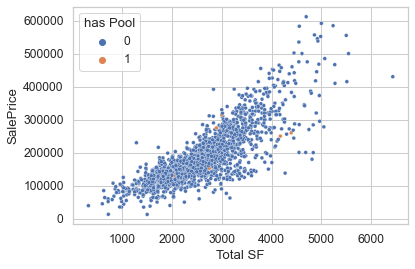

In [46]:
sns.scatterplot(x="Total SF", y="SalePrice", hue="has Pool", s=15, data=df_train);

## Comments:

We can see very few houses at Ames has a pool, "has Pool" feature might not be an interesting predictor.

#### 3.3.3.6 has Porch

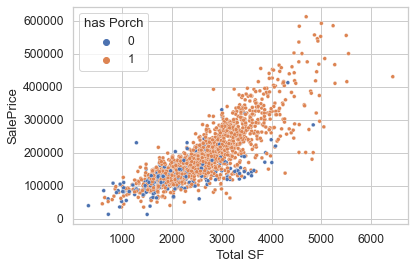

In [47]:
sns.scatterplot(x="Total SF", y="SalePrice", hue="has Porch", s=15, data=df_train);

## Comments:

Most houses at Ames have porch, it might not be an interesting predictor.

### 3.3.5 Age of Built

Text(0.5, 1.0, 'Age of Built vs Sale Price')

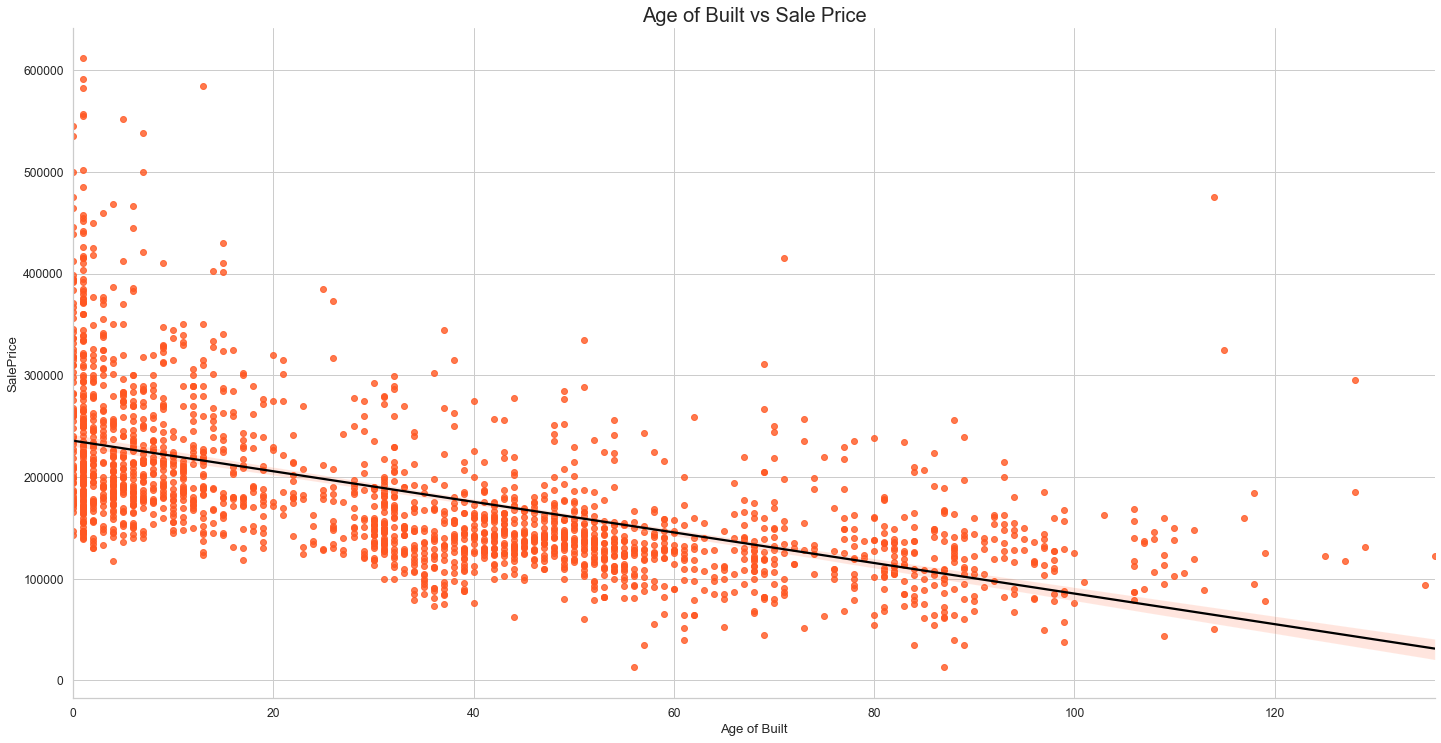

In [48]:
sns.set_palette(['#FF5722'])
sns.lmplot(x='Age of Built', y='SalePrice', data=df_train, height=10, aspect=2)
ax = plt.gca()
ax.get_lines()[0].set_color("black")
ax.set_title('Age of Built vs Sale Price',fontsize=20)

In [49]:
df_train['Age of Built'].describe()

count    2049.000000
mean       36.102489
std        30.204176
min         0.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: Age of Built, dtype: float64

## Comment:
1. From the scatter plot, We can see Age of Built is negatively correlated with the target Sales Price, which it means the younger a house it, the higher price it would be sold.
2. From the statistics description, We can see the average age of all sold houses is 36 years old, and mean age is 34 years old, the youngest is sold the same year as it's built, the oldest is 136 years old. 

## 4. Remove Multicolliear Features

Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. Multicollinearity is problem because it can increase the variance of the regression coefficients, making them unstable and difficult to interpret. You cannot tell significance of one independent variable on the dependent variable as there is collineraity with the other independent variable. Hence, we should remove one of the independent variable. 

Same as the correlation analysis during in "Part 1-Data Cleaning & Exploratory Data Analysis", Pearson Correlation will perform for continuous & discrete varibales. Spearman's Rank Correlation will perform for ordinal & nominal variables. 

With a rule assumption, a correlation between independent variables is above 0.6 is considered they are significantly correlated and I will remove one of them from the features.

### 4.1 Multicollinear check for Numerical variables

In [50]:
corr_numeric = df_train[continuous_cols + discrete_cols + ordinal_cols].corr(method = "pearson")
corr_numeric

,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
Lot Area,1.000000,0.166319,0.044453,0.040815,0.231147,0.348123,0.025898,0.001962,0.294542,0.246172,...,0.042197,0.022426,-0.089567,0.207598,0.118459,0.094251,0.092688,-0.003702,0.079301,-0.031399
BsmtFin SF 1,0.166319,1.000000,-0.049731,-0.499246,0.490675,0.412627,-0.181290,-0.081084,0.154625,0.311994,...,0.163678,0.119265,0.052647,0.237026,0.260908,0.170865,0.161199,0.221513,-0.007671,0.024663
BsmtFin SF 2,0.044453,-0.049731,1.000000,-0.231009,0.094526,0.102995,-0.087345,-0.002780,0.003554,0.014782,...,0.030022,0.034752,-0.077109,0.022739,0.009124,0.070914,0.055655,0.069294,0.046867,0.089794
Bsmt Unf SF,0.040815,-0.499246,-0.231009,1.000000,0.439002,0.311847,-0.011850,0.059688,0.239236,0.145770,...,0.015585,-0.090995,0.043585,0.051325,0.084084,-0.012961,-0.004805,-0.002656,-0.041309,-0.145603
Total Bsmt SF,0.231147,0.490675,0.094526,0.439002,1.000000,0.790246,-0.232955,-0.022390,0.410197,0.479245,...,0.196535,0.041452,0.069889,0.306576,0.360084,0.189985,0.182629,0.252299,-0.032860,-0.091701
1st Flr SF,0.348123,0.412627,0.102995,0.311847,0.790246,1.000000,-0.284219,-0.009843,0.530279,0.489472,...,0.139207,0.077235,-0.053282,0.360770,0.335727,0.177928,0.176731,0.195023,0.110237,-0.071348
2nd Flr SF,0.025898,-0.181290,-0.087345,-0.011850,-0.232955,-0.284219,1.000000,0.014691,0.655866,0.118696,...,0.037978,-0.083798,0.001222,0.230943,0.125874,0.027614,0.027175,-0.003226,-0.013079,-0.064791
Low Qual Fin SF,0.001962,-0.081084,-0.002780,0.059688,-0.022390,-0.009843,0.014691,1.000000,0.110368,-0.071100,...,0.001063,0.020308,-0.109360,0.001023,-0.100707,-0.111195,-0.110797,-0.060860,-0.006481,0.028269
Gr Liv Area,0.294542,0.154625,0.003554,0.239236,0.410197,0.530279,0.655866,0.110368,1.000000,0.478456,...,0.142011,-0.011012,-0.052009,0.483953,0.361660,0.151339,0.150061,0.142953,0.073880,-0.109464
Garage Area,0.246172,0.311994,0.014782,0.145770,0.479245,0.489472,0.118696,-0.071100,0.478456,1.000000,...,0.226170,0.010221,0.064085,0.318337,0.515792,0.549186,0.541018,0.294981,0.027585,-0.117966


### 4.2 Multicollinear check for ordinal & nominal variables

Define functions to do LabelEncoder & building of the Cramer's V function

In [51]:
# label encoder
def label_encoder(cols):
    
    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame()
    
    for i in cols:
        data_encoded[i] = label.fit_transform(df_train[i])
    
    return(data_encoded)

In [52]:
# build the Cramer's V function

def cramers_v(col1, col2):
    
    #build cross table
    crosstab = np.array(pd.crosstab(col1, col2))
    
    #keep of the test statistic of the chi2 test
    stat = chi2_contingency(crosstab)[0]
    #get no. of observations
    obs = np.sum(crosstab)
    #take the minimum value between the columns and thr rows of the cross table
    mini = min(crosstab.shape) -1
    
    return(stat/(obs*mini))

In [53]:
# Build the correlatin matrix

def cramerV_matrix(data):
    rows = []
    for col1 in data:
        col = []
        for col2 in data:
            cramers = cramers_v(data[col1], data[col2])
            col.append(round(cramers,2))
        rows.append(col)
    
    cramers_results = np.array(rows)
    df = pd.DataFrame(cramers_results, columns = data.columns, index = data.columns)
    
    return(df)

In [54]:
# plot correlation after cramerV_matrix

def plot_correlation(corr, title):
    sns.set_theme(style="white")
    # Increase the size of the heatmap.
    plt.figure(figsize=(25, 9))
    
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    
    # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
    # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
    heatmap = sns.heatmap(corr, mask=mask,vmin=-1, vmax=1, annot=True, cmap=cmap)

    # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
    heatmap.set_title(title, fontdict={'fontsize':16}, pad=12);

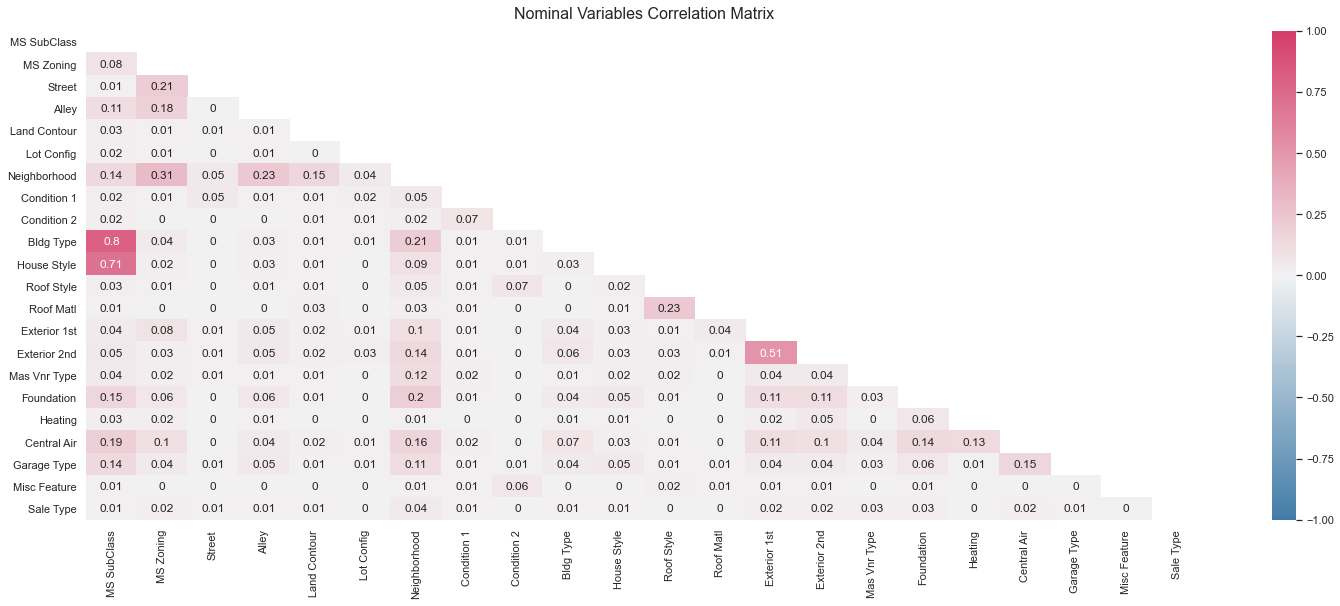

In [55]:
# do LabelEncoder & building of the Cramer's V function for Ordinal & Nominal Variables
ordinal_categorical = label_encoder(nominal_cols)
df_cat_matrix = cramerV_matrix(ordinal_categorical)
plot_correlation(df_cat_matrix,"Nominal Variables Correlation Matrix")

### 4.3 Filter highly Multicollinear correlated variables

In [56]:
#define a function to select highly correlated features
#it will remove the 1st feature that is correlated with anything other feature
def correlation(corr_matrix, threshold):
    
    #set of all names of highly correlated columns above threshold
    col_corr = set()  
    #corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # We are interested in absolute coeff values
            if abs(corr_matrix.iloc[i,j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return(col_corr)

In [57]:
#nominal features correlation that they are correlated with each other
corr_features_ordinal = correlation(df_cat_matrix, 0.6)
print(f'there are {len(set(corr_features_ordinal))} Contiuous, Discrete & Ordinal Variables are highly correlated {corr_features_ordinal}')
df_cat_matrix[df_cat_matrix > 0.6]

there are 2 Contiuous, Discrete & Ordinal Variables are highly correlated {'House Style', 'Bldg Type'}


,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type
MS SubClass,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MS Zoning,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,NaN,NaN,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Config,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bldg Type,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#numeric features correlation that they are correlated with each other
corr_features_numeric = correlation(corr_numeric, 0.6)
print(f'there are {len(set(corr_features_numeric))} Contiuous, Discrete & Ordinal Variables are highly correlated {corr_features_numeric}')
corr_numeric[corr_numeric > 0.6]

there are 20 Contiuous, Discrete & Ordinal Variables are highly correlated {'has Fireplace', 'has Pool', '1st Flr SF', 'Gr Liv Area', 'Yr Sold', 'Total SF', 'Garage Cars', 'Garage Qual', 'Bsmt Cond', 'Garage Cond', 'BsmtFin Type 2', 'Fireplace Qu', 'Total Bath', 'Pool QC', 'Year Built', 'Overall Qual', 'Bsmt Qual', 'Year Remod/Add', 'BsmtFin Type 1', 'has 2nd Flr'}


,Lot Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
Lot Area,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFin SF 1,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFin SF 2,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bsmt Unf SF,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Bsmt SF,NaN,NaN,NaN,NaN,1.000000,0.790246,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,NaN,NaN,NaN,NaN,0.790246,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Flr SF,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655866,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low Qual Fin SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gr Liv Area,NaN,NaN,NaN,NaN,NaN,NaN,0.655866,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.4 Remove highly Multicollinear correlated variables

In [59]:
# to drop "Total Bsmt SF", "1st Flr SF" , "2nd Flr SF", "Gr Liv Area", "Fireplaces", "Pool Area", "Garage Area", 
to_remove_1 = ["Total Bsmt SF", "1st Flr SF" , "2nd Flr SF", "Gr Liv Area", "Pool Area", "Garage Area"]
to_remove_2 = ["Fireplaces"]
to_remove = to_remove_1 + to_remove_2

In [60]:
# Remove these multicollinear features from HighCorrelation dataframe
continuous_cols = remove_frm_list(continuous_cols, to_remove_1)
discrete_cols = remove_frm_list(discrete_cols, to_remove_2)

In [61]:
df_train.drop(columns = to_remove , inplace = True)
df_test.drop(columns = to_remove , inplace = True)

# Add the dropped columns into del_cols group
del_cols.extend(to_remove)

In [62]:
corr_features_cat = correlation(df_cat_matrix, 0.6)
print(f'there are {len(set(corr_features_cat))} Ordinal & Nominal Variables are highly correlated {corr_features_cat}')

there are 2 Ordinal & Nominal Variables are highly correlated {'House Style', 'Bldg Type'}


In [63]:
nominal_cols.remove('Bldg Type')
df_train.drop(columns = ['Bldg Type'] , inplace = True)
df_test.drop(columns = ['Bldg Type'] , inplace = True)


# Add the dropped columns into del_cols group
del_cols.extend(['Bldg Type'])

## 5. Logarithmic Transformation of Sales Price

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


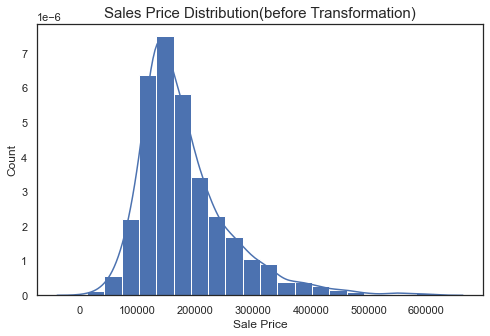

In [64]:
# check the distribution of Sales Price on Train Dataset
_, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Sales Price Distribution(before Transformation)", fontsize=15)
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
sns.distplot(df_train['SalePrice'], 
             norm_hist=False, 
             kde=True, 
             bins=20, 
             hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');

The distribution of housing sale prices tends to be strongly right-skewed, meaning there is a main concentration around the median house price, and then a small number of expensive homes that stretch the distribution upward, so that it is not normally distributed. 

It is often a good idea to normalize the distribution of the target variable in these cases, as skewed targets often lead to biased predictions at certain values - at larger sale prices, for instance, our model may underpredict the actual prices of homes. 

A good way to normalize right-skewed distributions is with a logarithmic transformation. Logarithmic functions are inverse to exponential functions. They have the effect of reducing wide-ranging values over orders of magnitude to a small scope.

In [65]:
#Log transformation of target variable
df_train['SalePrice_log'] = np.log(df_train['SalePrice'])

target_variable.extend(['SalePrice_log'])
target_variable

['SalePrice', 'SalePrice_log']

C:\Users\liubin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


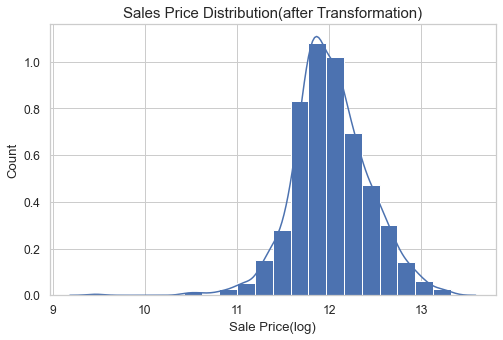

In [66]:
# check the distribution of Sales Price after Log Transformation on Train Dataset
_, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Sales Price Distribution(after Transformation)", fontsize=15)
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
sns.distplot(df_train['SalePrice_log'], 
             norm_hist=False, 
             kde=True, 
             bins=20, 
             hist_kws={"alpha": 1}).set(xlabel='Sale Price(log)', ylabel='Count');

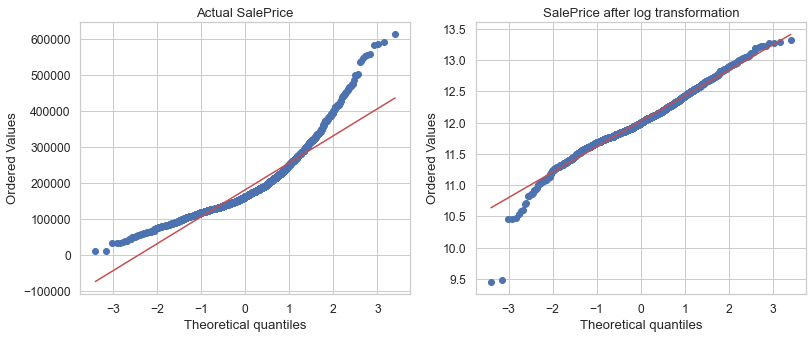

In [67]:
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
stats.probplot(df_train['SalePrice'], plot = plt)
plt.title('Actual SalePrice')
plt.subplot(1,2,2)
stats.probplot(df_train['SalePrice_log'], plot = plt)
plt.title('SalePrice after log transformation')
plt.show()

## Comments:
The plot illustrates what the logarithmic transformation achieves. In addition to reducing scale, the logarithm condenses large values toward the mean, while spreading out smaller values. This has the effect of normalizing the sale price distribution.

## 6. Correlation Analysis

In [68]:
 #create a dataframe to store all features' coefficient to target Sales price
def create_df_coef(corrs):
    df = pd.DataFrame(corrs)
    df.columns = ['Coefficient Values']
    df.index.names = ['features']
    df['features'] = df.index
    df.drop(index='SalePrice_log', inplace= True)
    
    return(df)

In [69]:
#define a function to plot the coefficient bar chart distribution
def plot_coefficient(df, title):
    
    plt.figure(figsize = (13,5))
    sns.set(style='whitegrid')
    sns.barplot(y='features', x='Coefficient Values', data=df)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

    return

In [70]:
cols = continuous_cols + discrete_cols+ordinal_cols
cols.append(target_variable[1])

In [71]:
corr_numeric = df_train[cols].corr(method = "pearson")

In [72]:
cols = nominal_cols
cols.append(target_variable[1])

ordinal_categorical = label_encoder(cols)
df_cat_matrix = cramerV_matrix(ordinal_categorical)

In [73]:
# transform the coefficient matrix into 2 datafram
corrs_1 = corr_numeric[['SalePrice_log']].abs()
corrs_2 = df_cat_matrix[['SalePrice_log']].abs()
df_1 = create_df_coef(corrs_1)
df_2 = create_df_coef(corrs_2)
df_coeff = df_1.append(df_2, ignore_index=True)
df_coeff.sort_values(by=['Coefficient Values'], ascending=False, inplace=True)

In [74]:
print(df_coeff[df_coeff['Coefficient Values'] >0.6])

    Coefficient Values      features
48            0.830000        Street
26            0.825607  Overall Qual
6             0.813575      Total SF
12            0.667439   Garage Cars
16            0.661308    Total Bath
47            0.640000     MS Zoning
8             0.624988  Age of Built
10            0.624820    Year Built


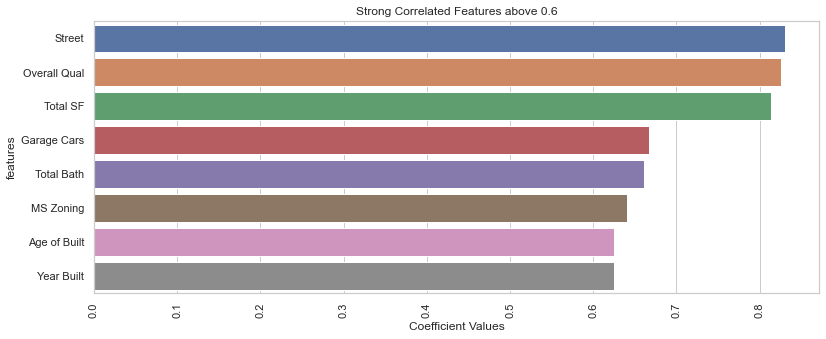

In [75]:
# Most commonly We assume the correlation >0.6 are highly correlated features influence to the target variable-Sales price.

strongly_corr_features = df_coeff[df_coeff['Coefficient Values'] >0.6]
title = "Strong Correlated Features above 0.6"
plot_coefficient(strongly_corr_features, title)

## 7. Export Dataset after Feature Engineering

## 7.1 Export Clean Data with transformation & feature engineering

In [76]:
path = "../datasets/part2/"

In [77]:
# exported updated datasets with cleaned and after feature engineering is completed
df_train.to_csv(path + "train_clean_with_transform_engineering_part2.csv", index = False)
df_test.to_csv(path + "test_clean_with_transform_engineering_part2.csv", index = False)

## 7.2 Export High Correlation Features

In [78]:
# save highly correlated features into highly_correlated_features.csv
strongly_corr_features.to_csv(path + "highly_corr_features_after_part2.csv", index = False)

## 7.3 Export Added & Removed Features

In [79]:
# Define a DataFrame for deleted & added features
df_features= pd.DataFrame({'FeatureName':del_cols + new_cols,
                     'Del/Add': ""})

for col in df_features['FeatureName']:
    if col in del_cols:
        df_features.loc[df_features['FeatureName']==col, 'Del/Add'] = "Deleted"
    elif col in new_cols:
        df_features.loc[df_features['FeatureName']==col, 'Del/Add'] = "Added"

        
# exported updated columns (exclude deleted columns & include created column)
df_features.to_csv(path + "Del_Add_Features_part2.csv", index = False)

## 7.4 Export All Features & Feature Types

In [80]:
# Define a DataFrame of latest updated features and features types
df_features= pd.DataFrame({'FeatureName':df_train.columns,
                     'FeatureType': ""})

for col in df_features['FeatureName']:
    if col in continuous_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Continuous"
    elif col in discrete_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Discrete"
    elif col in nominal_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Nominal"  
    elif col in ordinal_cols:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Ordinal"
    else:
        df_features.loc[df_features['FeatureName']==col, 'FeatureType'] = "Target"
        
df_features.groupby("FeatureType").count()

# exported updated columns (exclude deleted columns & include created column)
df_features.to_csv(path + "All_Features_cleaned_part2.csv", index = False)

# Conclusion


During the Part1 & Part2, I have completed Data Cleaning, EDA to find out feature correlation and created meaning features matrix. As of now, the Ames Train & Test Data is almost ready for modeling. (one more step for One-hot encode on Categorical data would done in Part3)
Below is feature counts summary:

- total features:69
- deleted features:24
- added features:11
- high correlation features:8 (with a threshold at 0.6)